In [1]:
!pip install mtcnn

In [2]:
import os
from PIL import Image
import numpy as np
from mtcnn import MTCNN
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import operator
from skimage import color

In [3]:
def show_input(input_image_path):
  image = Image.open(input_image_path)
  plt.imshow(image)
  plt.show()

In [4]:
# 화장한 이미지 데이터를 input 이미지로 설정
input_image_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL/Four_seasons/사계절_연예인 이미지 데이터셋/test data/auto_labeling/cool/F0448_IND_D_34_0_05.JPG'

# 추천 연예인 디렉토리 설정
image_directory = '/content/drive/MyDrive/Colab Notebooks/AIFFEL/Four_seasons/사계절_연예인 이미지 데이터셋/Recommendation system/연예인사진'


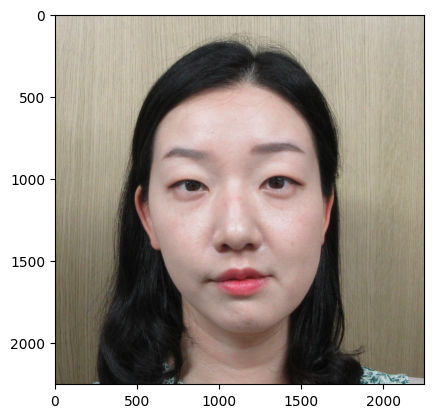

In [5]:
show_input(input_image_path)

In [6]:
# 코사인 유사도 함수 / 픽셀당 계산
def compute_cosine_similarity(face1, face2):
    return cosine_similarity(face1.reshape(1, -1), face2.reshape(1, -1))

detector = MTCNN()

def crop_face(image_path):
    image = Image.open(image_path).convert('RGB')
    image_np = np.array(image)
    result = detector.detect_faces(image_np)
    if len(result) == 0:
        return None
    x1, y1, width, height = result[0]['box']
    x2, y2 = x1 + width, y1 + height
    cropped_face = image_np[y1:y2, x1:x2]
    resized_face = cv2.resize(cropped_face, (224, 224))
    return resized_face


## 탐색 알고리즘 사용해서 다시 짜보기, 픽셀값 전부 저장할 수 있도록 코드 수정하기.
# def preprocess_images(image_directory):
#     preprocessed_images = {}

#     for filename in os.listdir(image_directory):
#         if filename.endswith('.jpg') or filename.endswith('.JPG'):
#             face = crop_face(os.path.join(image_directory, filename))
#             if face is None:
#                 continue
#             face = face / 255.0
#             face = color.rgb2lab(face)
#             preprocessed_images[filename] = (face, Image.open(os.path.join(image_directory, filename)))

#     return preprocessed_images

# def find_most_similar_images(input_image_path, preprocessed_images):
#     input_face = crop_face(input_image_path)
#     if input_face is None:
#         return []
#     input_face = input_face / 255.0
#     input_face = color.rgb2lab(input_face)

#     similarity_scores = {}
#     for filename, (img, orig_img) in preprocessed_images.items():
#         if img.shape != input_face.shape:
#             continue
#         similarity_score = compute_cosine_similarity(input_face.flatten(), img.flatten())
#         similarity_scores[filename] = (similarity_score[0][0], orig_img)

#     sorted_scores = sorted(similarity_scores.items(), key=lambda x: x[1][0], reverse=True)

#     top_images = [(filename, img, score) for filename, (score, img) in sorted_scores[:3]]

#     return top_images

In [12]:
import json

def preprocess_images(image_directory):
    preprocessed_images = {}

    for filename in os.listdir(image_directory):
        if filename.endswith('.jpg') or filename.endswith('.JPG'):
            face = crop_face(os.path.join(image_directory, filename))
            if face is None:
                continue
            face = face / 255.0
            face = color.rgb2lab(face)
            preprocessed_images[filename] = face.tolist()  # Convert numpy array to list

    return preprocessed_images

preprocessed_images = preprocess_images(image_directory)

# Save to JSON
with open('preprocessed_images.json', 'w') as f:
    json.dump(preprocessed_images, f)



def find_most_similar_images(input_image_path, preprocessed_images):
    input_face = crop_face(input_image_path)
    if input_face is None:
        return []
    input_face = input_face / 255.0
    input_face = color.rgb2lab(input_face)

    similarity_scores = {}
    for filename, img in preprocessed_images.items():
        if img.shape != input_face.shape:
            continue
        similarity_score = compute_cosine_similarity(input_face.flatten(), img.flatten())
        similarity_scores[filename] = similarity_score[0][0]

    sorted_scores = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)

    top_images = [(filename, score) for filename, score in sorted_scores[:3]]

    return top_images

1/1 [==============================] - 0s 21ms/step


In [13]:
# Load from JSON
with open('preprocessed_images.json', 'r') as f:
    preprocessed_images = json.load(f)

# Convert all values back to numpy arrays
for filename in preprocessed_images:
    preprocessed_images[filename] = np.array(preprocessed_images[filename])

# Now you can call the function with the loaded dictionary
find_most_similar_images(input_image_path, preprocessed_images)

1/1 [==============================] - 0s 22ms/step


[('트와이스쯔위.jpg', 0.9567378228259399),
 ('이다희.jpg', 0.95174310391052),
 ('아이즈원민주.jpg', 0.9506590668807642)]

In [8]:
# preprocessed_images = preprocess_images(image_directory)

In [9]:
print(preprocessed_images)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [14]:
find_most_similar_images(input_image_path, preprocessed_images)

1/1 [==============================] - 0s 24ms/step


[('트와이스쯔위.jpg', 0.9567378228259399),
 ('이다희.jpg', 0.95174310391052),
 ('아이즈원민주.jpg', 0.9506590668807642)]

In [15]:
!sudo apt-get install -y fonts-nanum*

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
# from matplotlib import font_manager

# for font in font_manager.findSystemFonts():
#     if "nanum" in font.lower():
#         print(font)

1/1 [==============================] - 0s 27ms/step


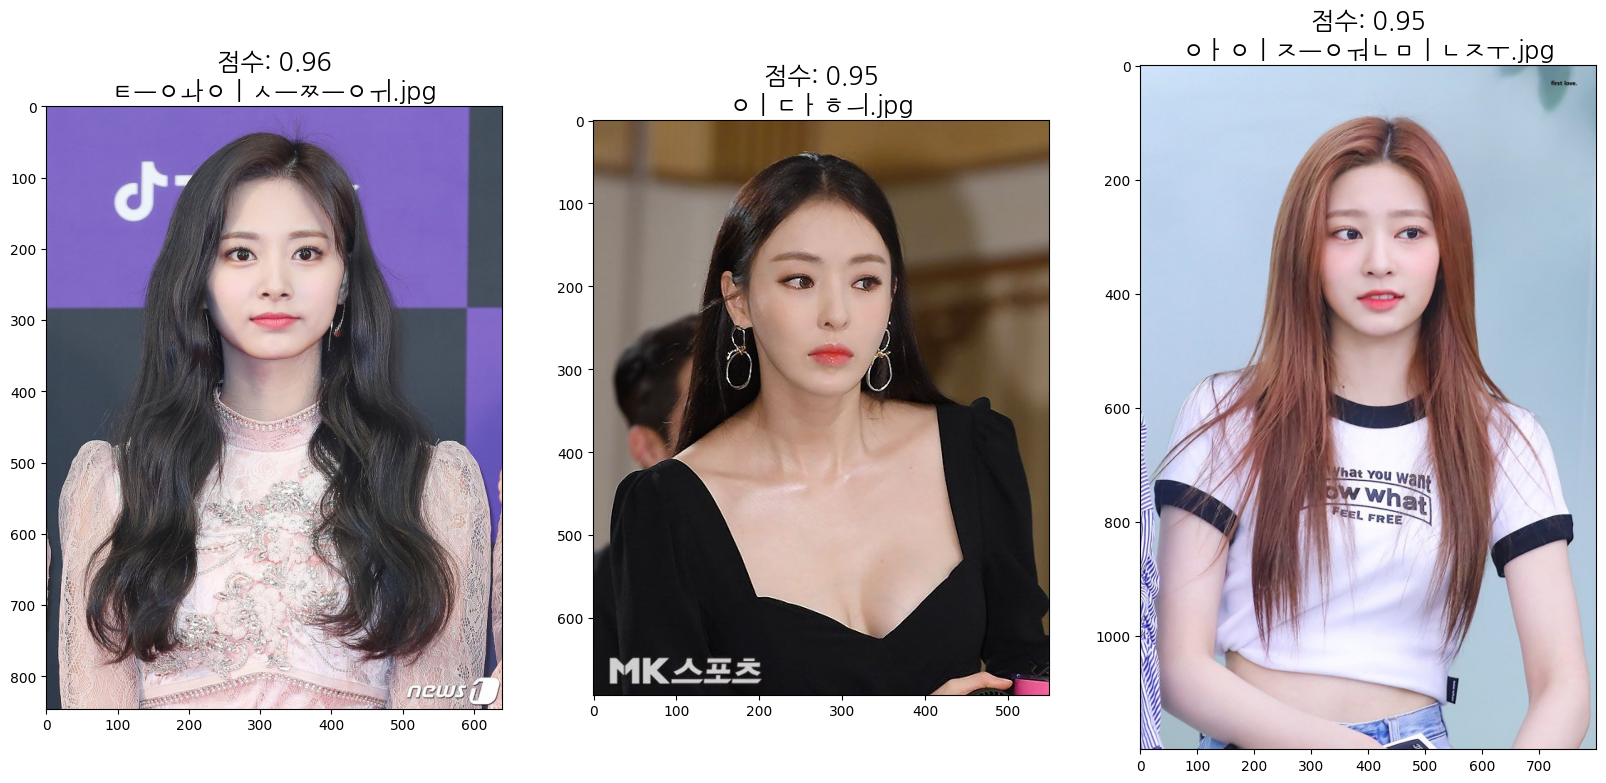

In [17]:
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Replace with the actual path to the font file on your system
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=18)

# top_images = find_most_similar_images(input_image_path, preprocessed_images)

# for i, (filename, img, score) in enumerate(top_images):
#     plt.subplot(1, len(top_images), i+1)
#     plt.imshow(img)
#     plt.title(f"점수: {score:.2f}\n{filename}", fontproperties=font_prop)
#     plt.axis('off')

# plt.show()

top_images = find_most_similar_images(input_image_path, preprocessed_images)

fig, axes = plt.subplots(1, len(top_images), figsize=(20, 20))
for i, (filename, score) in enumerate(top_images):
    img = Image.open(os.path.join(image_directory, filename))  # Load image
    axes[i].imshow(img)
    axes[i].set_title(f"점수: {score:.2f}\n{filename}", fontproperties=font_prop)
plt.show()


In [ ]:
## 제이슨으로 ... 딕셔너리 형태로 이미지와 해당 값들 저장하기
## 키 밸류 -> 키 값에 따라서....하아하아하아ㅏ아앙ㅇ아ㅏㅏㅏㅏㅏ